In [1]:
import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
#import librosa
#import librosa.display

import utils

In [4]:
os.chdir('project_part1/fma_metadata')
X = np.load('X_cleaned_attempt_new.npy',allow_pickle=True)
Y = np.load('Y_cleaned_attempt_new.npy',allow_pickle=True)
feature_map = {'Rock':0,'Electronic':1,'Experimental':2,'Hip-Hop':3,'Folk':4,'Instrumental':5,'Pop':6,
              'International':7,'Classical':8,'Old-Time / Historic':9, 'Jazz':10,'Country':11,'Soul-RnB':12,
              'Spoken':13,'Blues':14,'Easy Listening':15}
for i in range(Y.shape[0]):
    Y[i] = float(feature_map[Y[i]])
Y[i] = np.asarray(Y[i]).astype('float32')

In [47]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [85]:
#for (i,j) in zip(range(X.shape[0]),range(X.shape[1])):
 #  assert first_X[i,j] == scaled_X[i,j] (assertion failed)

def train_mlp(X,Y,init_activation,hidden_layers,activation_funcs,optimizer,loss,metrics,epochs):
    
    #usage: history = train_mlp(X,Y,input_dim,hidden_layers,activation_funcs,optimizer,loss,metrics,epochs)
    
    # X: input training matrix
    # Y: labels (numerical)
    # init_activation: activation function for the first layer (just easier to code if it's separate from the others)
    # hidden_layers: list of numbers of nodes for hidden each layer,
    # --------------> starting from the second (the first will have all 520 features)
    # activation_funcs: activation function for each hidden layer (string)
    # optimizer: some kind of thing
    # loss: string specifying loss function
    # metrics: list of strings of metrics to use to measure the success of the model on training set
    # epochs: number of training epochs
    
    # first, scale data to mean 0 and variance 1
    scaler = StandardScaler()
    scaler.fit(X)
    X = scaler.transform(X)
    
    # then, get X and Y in proper forms
    X = np.asarray(X).astype('float32')
    Y = np.asarray(Y).astype('float32')
    
    inputs = keras.Input(shape=X.shape[1], )
    x = layers.Dense(Y.shape[0], activation="relu")(inputs)
    for n in range(len(hidden_layers)):
        x = layers.Dense(hidden_layers[n],activation=activation_funcs[n])(x)
    outputs = layers.Dense(16, activation="softmax")(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=optimizer,loss=loss,metrics=metrics)
    return (X, Y, model) 

In [93]:
# now we need to load in the test data
X_test = np.load('X_test.npy',allow_pickle=True)
Y_test = np.load("Y_test.npy",allow_pickle=True)
X_test = np.asarray(X_test).astype('float32')
Y_test = np.asarray(Y_test).astype('float32')

Epoch 1/200
293/293 [==============================] - 16s 51ms/step - loss: 1.7547 - accuracy: 0.4540
Epoch 2/200
293/293 [==============================] - 15s 50ms/step - loss: 1.4292 - accuracy: 0.5375
Epoch 3/200
293/293 [==============================] - 14s 47ms/step - loss: 1.2647 - accuracy: 0.5848
Epoch 4/200
293/293 [==============================] - 14s 47ms/step - loss: 1.1497 - accuracy: 0.6241
Epoch 5/200
293/293 [==============================] - 13s 45ms/step - loss: 1.0518 - accuracy: 0.6514
Epoch 6/200
293/293 [==============================] - 13s 44ms/step - loss: 0.9324 - accuracy: 0.6900
Epoch 7/200
293/293 [==============================] - 13s 45ms/step - loss: 0.8442 - accuracy: 0.7189
Epoch 8/200
293/293 [==============================] - 13s 44ms/step - loss: 0.7205 - accuracy: 0.7570
Epoch 9/200
293/293 [==============================] - 13s 45ms/step - loss: 0.6285 - accuracy: 0.7886
Epoch 10/200
293/293 [==============================] - 14s 46ms/step - l

293/293 [==============================] - 13s 45ms/step - loss: 0.0487 - accuracy: 0.9871
Epoch 80/200
293/293 [==============================] - 13s 45ms/step - loss: 0.0577 - accuracy: 0.9853
Epoch 81/200
293/293 [==============================] - 14s 46ms/step - loss: 0.1419 - accuracy: 0.9690
Epoch 82/200
293/293 [==============================] - 15s 51ms/step - loss: 0.1492 - accuracy: 0.9660
Epoch 83/200
293/293 [==============================] - 14s 49ms/step - loss: 0.0784 - accuracy: 0.9814
Epoch 84/200
293/293 [==============================] - 14s 48ms/step - loss: 0.0321 - accuracy: 0.9917
Epoch 85/200
293/293 [==============================] - 13s 45ms/step - loss: 0.0404 - accuracy: 0.9871
Epoch 86/200
293/293 [==============================] - 13s 44ms/step - loss: 0.0693 - accuracy: 0.9841
Epoch 87/200
293/293 [==============================] - 13s 43ms/step - loss: 0.1141 - accuracy: 0.9732
Epoch 88/200
293/293 [==============================] - 13s 44ms/step - loss:

293/293 [==============================] - 13s 44ms/step - loss: 0.0395 - accuracy: 0.9917
Epoch 158/200
293/293 [==============================] - 13s 45ms/step - loss: 0.0339 - accuracy: 0.9942
Epoch 159/200
293/293 [==============================] - 13s 44ms/step - loss: 0.0425 - accuracy: 0.9909
Epoch 160/200
293/293 [==============================] - 13s 44ms/step - loss: 0.0826 - accuracy: 0.9838
Epoch 161/200
293/293 [==============================] - 13s 44ms/step - loss: 0.1111 - accuracy: 0.9787
Epoch 162/200
293/293 [==============================] - 13s 44ms/step - loss: 0.0794 - accuracy: 0.9846
Epoch 163/200
293/293 [==============================] - 13s 44ms/step - loss: 0.0284 - accuracy: 0.9945
Epoch 164/200
293/293 [==============================] - 13s 45ms/step - loss: 0.0431 - accuracy: 0.9919
Epoch 165/200
293/293 [==============================] - 14s 47ms/step - loss: 0.0716 - accuracy: 0.9859
Epoch 166/200
293/293 [==============================] - 13s 44ms/ste

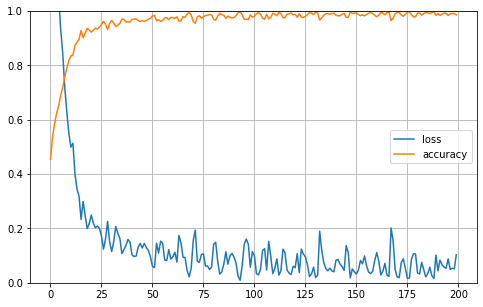

In [235]:
#####################################################GO HERE FOR RECORDING############################3
######################################################################################################
input_dim = X.shape[1]
hidden_layers = [256,100]
init_activation = 'relu'
activation_funcs = ['relu','relu']
optimizer = 'adam'
loss = "sparse_categorical_crossentropy"
metrics = ["accuracy"]
epochs = 200
(X, Y, model) = train_mlp(X,Y,init_activation,hidden_layers,activation_funcs,optimizer,loss,metrics,epochs)
history = model.fit(X,Y,epochs=epochs,)
results = model.evaluate(X_test,Y_test)
print("test loss, test acc:", results)
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [197]:
# The example for how to train is complete! Let's see what the baseline accuracy of guessing the most common class is:
counts = []
for i in range(16):
    counts.append(0)
for i in Y_test:
    counts[int(i)]+=1
print(counts[0]/sum(counts))
print(counts[1]/sum(counts))

0.3274863971775696
0.2079803224924843


In [164]:
#Next step is to make the separate arrays to test. 
X_chroma_cens = X[:,:84]
X_chroma_cens_test = X_test[:,:84]
X_chroma_cqt = X[:,84:168]
X_chroma_cqt_test = X_test[:,84:168]
X_chroma_stft = X[:,168:252]
X_chroma_stft_test = X_test[:,168:252]

X_mfcc = X[:,252:392]
X_mfcc_test = X_test[:,252:392]

X_rmse = X[:,393:399]
X_rmse_test = X_test[:,393:399]

X_spectral_bandwidth = X[:,399:406]
X_spectral_bandwidth_test = X_test[:,399:406]

X_spectral_centroid = X[:,406:413]
X_spectral_centroid_test = X_test[:,406:413]

X_spectral_contrast = X[:,413:462]
X_spectral_contrast_test = X_test[:,413:462]

X_spectral_rolloff = X[:,462:469]
X_spectral_rolloff_test = X_test[:,462:469]

X_tonnetz = X[:,469:511]
X_tonnetz_test = X_test[:,469:511]

X_zcr = X[:,511:518]
X_zcr_test = X_test[:,511:518]

X_dates = X[:,518].reshape(X_dates.shape[0],1)
X_test_dates = X_test[:,518].reshape(X_test.shape[0],1)

X_duration = X[:,519].reshape(X_duration.shape[0],1)
X_test_duration = X_test[:,519].reshape(X_test.shape[0],1)

In [ ]:
# for the mlp, we want to collapse the chroma time series 

In [151]:
#input_dim = X_dates.shape[1]
# need to do 1 instead because that axis has dimension 0
input_dim = 1
hidden_layers = [1,1]
init_activation = 'relu'
activation_funcs = ['relu','relu']
optimizer = 'adam'
loss = "sparse_categorical_crossentropy"
metrics = ["accuracy"]
epochs = 200
(X_dates, Y, model) = train_mlp(X_dates,Y,init_activation,hidden_layers,activation_funcs,optimizer,loss,metrics,epochs)
history = model.fit(X_dates,Y,epochs=epochs,)
results = model.evaluate(X_test_dates,Y_test)
print("test loss, test acc:", results)

Epoch 1/200
293/293 [==============================] - 4s 11ms/step - loss: 2.7106 - accuracy: 0.1067
Epoch 2/200
293/293 [==============================] - 3s 10ms/step - loss: 2.6217 - accuracy: 0.1029
Epoch 3/200
293/293 [==============================] - 3s 9ms/step - loss: 2.5691 - accuracy: 0.1033
Epoch 4/200
293/293 [==============================] - 2s 8ms/step - loss: 2.5378 - accuracy: 0.1017
Epoch 5/200
293/293 [==============================] - 3s 10ms/step - loss: 2.5183 - accuracy: 0.0994
Epoch 6/200
293/293 [==============================] - 3s 10ms/step - loss: 2.5060 - accuracy: 0.0970
Epoch 7/200
293/293 [==============================] - 3s 10ms/step - loss: 2.4977 - accuracy: 0.0990
Epoch 8/200
293/293 [==============================] - 3s 9ms/step - loss: 2.4921 - accuracy: 0.1055
Epoch 9/200
293/293 [==============================] - 2s 8ms/step - loss: 2.4880 - accuracy: 0.1042
Epoch 10/200
293/293 [==============================] - 3s 10ms/step - loss: 2.4851 - 

293/293 [==============================] - 3s 9ms/step - loss: 2.4758 - accuracy: 0.1071
Epoch 82/200
293/293 [==============================] - 3s 10ms/step - loss: 2.4758 - accuracy: 0.1027
Epoch 83/200
293/293 [==============================] - 2s 8ms/step - loss: 2.4758 - accuracy: 0.1023
Epoch 84/200
293/293 [==============================] - 2s 8ms/step - loss: 2.4758 - accuracy: 0.1026
Epoch 85/200
293/293 [==============================] - 2s 8ms/step - loss: 2.4758 - accuracy: 0.1030
Epoch 86/200
293/293 [==============================] - 2s 8ms/step - loss: 2.4758 - accuracy: 0.1027
Epoch 87/200
293/293 [==============================] - 2s 7ms/step - loss: 2.4758 - accuracy: 0.0994
Epoch 88/200
293/293 [==============================] - 2s 7ms/step - loss: 2.4758 - accuracy: 0.0996
Epoch 89/200
293/293 [==============================] - 2s 7ms/step - loss: 2.4759 - accuracy: 0.0998
Epoch 90/200
293/293 [==============================] - 2s 7ms/step - loss: 2.4758 - accuracy:

293/293 [==============================] - 3s 9ms/step - loss: 2.4758 - accuracy: 0.0994
Epoch 161/200
293/293 [==============================] - 3s 9ms/step - loss: 2.4758 - accuracy: 0.1027
Epoch 162/200
293/293 [==============================] - 3s 9ms/step - loss: 2.4758 - accuracy: 0.1030
Epoch 163/200
293/293 [==============================] - 3s 9ms/step - loss: 2.4758 - accuracy: 0.1041
Epoch 164/200
293/293 [==============================] - 2s 7ms/step - loss: 2.4759 - accuracy: 0.1045
Epoch 165/200
293/293 [==============================] - 3s 9ms/step - loss: 2.4759 - accuracy: 0.0972
Epoch 166/200
293/293 [==============================] - 3s 10ms/step - loss: 2.4758 - accuracy: 0.1004
Epoch 167/200
293/293 [==============================] - 2s 8ms/step - loss: 2.4758 - accuracy: 0.1009
Epoch 168/200
293/293 [==============================] - 3s 9ms/step - loss: 2.4758 - accuracy: 0.1043
Epoch 169/200
293/293 [==============================] - 3s 9ms/step - loss: 2.4758 - 

In [152]:
#input_dim = X_dates.shape[1]
# need to do 1 instead because that axis has dimension 0

input_dim = 1
hidden_layers = [1,1]
init_activation = 'relu'
activation_funcs = ['relu','relu']
optimizer = 'adam'
loss = "sparse_categorical_crossentropy"
metrics = ["accuracy"]
epochs = 200
(X_duration, Y, model) = train_mlp(X_duration,Y,init_activation,hidden_layers,activation_funcs,optimizer,loss,metrics,epochs)
history = model.fit(X_duration,Y,epochs=epochs,)
results = model.evaluate(X_test_duration,Y_test)
print("test loss, test acc:", results)

Epoch 1/200
293/293 [==============================] - 6s 8ms/step - loss: 2.7112 - accuracy: 0.1046
Epoch 2/200
293/293 [==============================] - 3s 10ms/step - loss: 2.6222 - accuracy: 0.1045
Epoch 3/200
293/293 [==============================] - 3s 10ms/step - loss: 2.5695 - accuracy: 0.1024
Epoch 4/200
293/293 [==============================] - 3s 11ms/step - loss: 2.5382 - accuracy: 0.1007
Epoch 5/200
293/293 [==============================] - 3s 11ms/step - loss: 2.5188 - accuracy: 0.1029
Epoch 6/200
293/293 [==============================] - 3s 9ms/step - loss: 2.5063 - accuracy: 0.1004
Epoch 7/200
293/293 [==============================] - 3s 9ms/step - loss: 2.4979 - accuracy: 0.1028
Epoch 8/200
293/293 [==============================] - 3s 9ms/step - loss: 2.4922 - accuracy: 0.1041
Epoch 9/200
293/293 [==============================] - 3s 9ms/step - loss: 2.4881 - accuracy: 0.1042
Epoch 10/200
293/293 [==============================] - 2s 8ms/step - loss: 2.4851 - ac

293/293 [==============================] - 2s 8ms/step - loss: 2.4758 - accuracy: 0.0980
Epoch 82/200
293/293 [==============================] - 3s 9ms/step - loss: 2.4758 - accuracy: 0.0994
Epoch 83/200
293/293 [==============================] - 3s 9ms/step - loss: 2.4758 - accuracy: 0.1050
Epoch 84/200
293/293 [==============================] - 3s 10ms/step - loss: 2.4758 - accuracy: 0.0982
Epoch 85/200
293/293 [==============================] - 2s 8ms/step - loss: 2.4758 - accuracy: 0.1021
Epoch 86/200
293/293 [==============================] - 3s 10ms/step - loss: 2.4758 - accuracy: 0.1030
Epoch 87/200
293/293 [==============================] - 3s 9ms/step - loss: 2.4758 - accuracy: 0.1038
Epoch 88/200
293/293 [==============================] - 3s 10ms/step - loss: 2.4758 - accuracy: 0.1019
Epoch 89/200
293/293 [==============================] - 3s 10ms/step - loss: 2.4759 - accuracy: 0.1047
Epoch 90/200
293/293 [==============================] - 3s 9ms/step - loss: 2.4758 - accura

293/293 [==============================] - 2s 8ms/step - loss: 2.4758 - accuracy: 0.1008
Epoch 161/200
293/293 [==============================] - 2s 8ms/step - loss: 2.4758 - accuracy: 0.1017
Epoch 162/200
293/293 [==============================] - 2s 8ms/step - loss: 2.4758 - accuracy: 0.1003
Epoch 163/200
293/293 [==============================] - 3s 10ms/step - loss: 2.4758 - accuracy: 0.1054
Epoch 164/200
293/293 [==============================] - 3s 9ms/step - loss: 2.4758 - accuracy: 0.1059
Epoch 165/200
293/293 [==============================] - 3s 9ms/step - loss: 2.4758 - accuracy: 0.1027
Epoch 166/200
293/293 [==============================] - 3s 10ms/step - loss: 2.4758 - accuracy: 0.0989
Epoch 167/200
293/293 [==============================] - 3s 10ms/step - loss: 2.4758 - accuracy: 0.1013
Epoch 168/200
293/293 [==============================] - 3s 9ms/step - loss: 2.4758 - accuracy: 0.1030
Epoch 169/200
293/293 [==============================] - 3s 9ms/step - loss: 2.4758 

In [153]:
input_dim = X_zcr.shape[1]
hidden_layers = [4,2]
init_activation = 'relu'
activation_funcs = ['relu','relu']
optimizer = 'adam'
loss = "sparse_categorical_crossentropy"
metrics = ["accuracy"]
epochs = 200
(X_zcr, Y, model) = train_mlp(X_zcr,Y,init_activation,hidden_layers,activation_funcs,optimizer,loss,metrics,epochs)
history = model.fit(X_zcr,Y,epochs=epochs,)
results = model.evaluate(X_zcr_test,Y_test)
print("test loss, test acc:", results)

Epoch 1/200
293/293 [==============================] - 1s 4ms/step - loss: 2.6486 - accuracy: 0.1535
Epoch 2/200
293/293 [==============================] - 1s 3ms/step - loss: 2.5147 - accuracy: 0.1604
Epoch 3/200
293/293 [==============================] - 1s 4ms/step - loss: 2.4500 - accuracy: 0.1608
Epoch 4/200
293/293 [==============================] - 1s 3ms/step - loss: 2.4116 - accuracy: 0.1647
Epoch 5/200
293/293 [==============================] - 1s 3ms/step - loss: 2.3860 - accuracy: 0.1681
Epoch 6/200
293/293 [==============================] - 1s 3ms/step - loss: 2.3674 - accuracy: 0.1745
Epoch 7/200
293/293 [==============================] - 1s 4ms/step - loss: 2.3556 - accuracy: 0.1792
Epoch 8/200
293/293 [==============================] - 1s 4ms/step - loss: 2.3440 - accuracy: 0.1800
Epoch 9/200
293/293 [==============================] - 1s 3ms/step - loss: 2.3336 - accuracy: 0.1742
Epoch 10/200
293/293 [==============================] - 1s 3ms/step - loss: 2.3264 - accura

293/293 [==============================] - 1s 4ms/step - loss: 2.2281 - accuracy: 0.2105
Epoch 82/200
293/293 [==============================] - 1s 4ms/step - loss: 2.2288 - accuracy: 0.2098
Epoch 83/200
293/293 [==============================] - 1s 4ms/step - loss: 2.2300 - accuracy: 0.2164
Epoch 84/200
293/293 [==============================] - 1s 4ms/step - loss: 2.2306 - accuracy: 0.2100
Epoch 85/200
293/293 [==============================] - 1s 4ms/step - loss: 2.2292 - accuracy: 0.2083
Epoch 86/200
293/293 [==============================] - 1s 4ms/step - loss: 2.2315 - accuracy: 0.2075
Epoch 87/200
293/293 [==============================] - 1s 4ms/step - loss: 2.2279 - accuracy: 0.2108
Epoch 88/200
293/293 [==============================] - 1s 4ms/step - loss: 2.2256 - accuracy: 0.2147
Epoch 89/200
293/293 [==============================] - 1s 4ms/step - loss: 2.2263 - accuracy: 0.2130
Epoch 90/200
293/293 [==============================] - 1s 4ms/step - loss: 2.2253 - accuracy: 

293/293 [==============================] - 1s 4ms/step - loss: 2.2063 - accuracy: 0.2137
Epoch 161/200
293/293 [==============================] - 1s 4ms/step - loss: 2.2053 - accuracy: 0.2170
Epoch 162/200
293/293 [==============================] - 1s 4ms/step - loss: 2.2038 - accuracy: 0.2180
Epoch 163/200
293/293 [==============================] - 1s 4ms/step - loss: 2.2029 - accuracy: 0.2136
Epoch 164/200
293/293 [==============================] - 1s 4ms/step - loss: 2.2068 - accuracy: 0.2210
Epoch 165/200
293/293 [==============================] - 1s 4ms/step - loss: 2.2017 - accuracy: 0.2230
Epoch 166/200
293/293 [==============================] - 1s 4ms/step - loss: 2.2032 - accuracy: 0.2159
Epoch 167/200
293/293 [==============================] - 1s 4ms/step - loss: 2.2018 - accuracy: 0.2149
Epoch 168/200
293/293 [==============================] - 1s 4ms/step - loss: 2.2038 - accuracy: 0.2212
Epoch 169/200
293/293 [==============================] - 1s 4ms/step - loss: 2.2089 - a

In [154]:

input_dim = X_spectral_rolloff.shape[1]
hidden_layers = [4,2]
init_activation = 'relu'
activation_funcs = ['relu','relu']
optimizer = 'adam'
loss = "sparse_categorical_crossentropy"
metrics = ["accuracy"]
epochs = 200
(X_spectral_rolloff, Y, model) = train_mlp(X_spectral_rolloff,Y,init_activation,hidden_layers,activation_funcs,optimizer,loss,metrics,epochs)
history = model.fit(X_spectral_rolloff,Y,epochs=epochs,)
results = model.evaluate(X_spectral_rolloff_test,Y_test)
print("test loss, test acc:", results)

Epoch 1/200
293/293 [==============================] - 1s 4ms/step - loss: 2.6066 - accuracy: 0.1372
Epoch 2/200
293/293 [==============================] - 1s 4ms/step - loss: 2.4173 - accuracy: 0.1547
Epoch 3/200
293/293 [==============================] - 1s 3ms/step - loss: 2.3258 - accuracy: 0.1738
Epoch 4/200
293/293 [==============================] - 1s 3ms/step - loss: 2.2982 - accuracy: 0.2016
Epoch 5/200
293/293 [==============================] - 1s 3ms/step - loss: 2.2930 - accuracy: 0.2076
Epoch 6/200
293/293 [==============================] - 1s 3ms/step - loss: 2.2817 - accuracy: 0.2248
Epoch 7/200
293/293 [==============================] - 1s 3ms/step - loss: 2.2757 - accuracy: 0.2236
Epoch 8/200
293/293 [==============================] - 1s 3ms/step - loss: 2.2696 - accuracy: 0.2487
Epoch 9/200
293/293 [==============================] - 1s 3ms/step - loss: 2.2648 - accuracy: 0.2412
Epoch 10/200
293/293 [==============================] - 1s 4ms/step - loss: 2.2627 - accura

293/293 [==============================] - 1s 4ms/step - loss: 2.1272 - accuracy: 0.2934
Epoch 82/200
293/293 [==============================] - 1s 4ms/step - loss: 2.1249 - accuracy: 0.2932
Epoch 83/200
293/293 [==============================] - 1s 4ms/step - loss: 2.1247 - accuracy: 0.2933
Epoch 84/200
293/293 [==============================] - 1s 4ms/step - loss: 2.1222 - accuracy: 0.2993
Epoch 85/200
293/293 [==============================] - 1s 4ms/step - loss: 2.1233 - accuracy: 0.2919
Epoch 86/200
293/293 [==============================] - 1s 4ms/step - loss: 2.1214 - accuracy: 0.2929
Epoch 87/200
293/293 [==============================] - 1s 4ms/step - loss: 2.1232 - accuracy: 0.2959
Epoch 88/200
293/293 [==============================] - 1s 4ms/step - loss: 2.1209 - accuracy: 0.2992
Epoch 89/200
293/293 [==============================] - 1s 4ms/step - loss: 2.1229 - accuracy: 0.2971
Epoch 90/200
293/293 [==============================] - 1s 4ms/step - loss: 2.1196 - accuracy: 

293/293 [==============================] - 1s 4ms/step - loss: 2.0881 - accuracy: 0.3103
Epoch 161/200
293/293 [==============================] - 1s 4ms/step - loss: 2.0898 - accuracy: 0.3101
Epoch 162/200
293/293 [==============================] - 1s 4ms/step - loss: 2.0861 - accuracy: 0.3070
Epoch 163/200
293/293 [==============================] - 1s 4ms/step - loss: 2.0839 - accuracy: 0.3114
Epoch 164/200
293/293 [==============================] - 1s 4ms/step - loss: 2.0854 - accuracy: 0.3094
Epoch 165/200
293/293 [==============================] - 1s 4ms/step - loss: 2.0867 - accuracy: 0.3066
Epoch 166/200
293/293 [==============================] - 1s 4ms/step - loss: 2.0858 - accuracy: 0.3068
Epoch 167/200
293/293 [==============================] - 1s 5ms/step - loss: 2.0816 - accuracy: 0.3110
Epoch 168/200
293/293 [==============================] - 1s 4ms/step - loss: 2.0834 - accuracy: 0.3098
Epoch 169/200
293/293 [==============================] - 1s 4ms/step - loss: 2.0847 - a

In [155]:

input_dim = X_spectral_centroid.shape[1]
hidden_layers = [4,2]
init_activation = 'relu'
activation_funcs = ['relu','relu']
optimizer = 'adam'
loss = "sparse_categorical_crossentropy"
metrics = ["accuracy"]
epochs = 200
(X_spectral_centroid, Y, model) = train_mlp(X_spectral_centroid,Y,init_activation,hidden_layers,activation_funcs,optimizer,loss,metrics,epochs)
history = model.fit(X_spectral_centroid,Y,epochs=epochs,)
results = model.evaluate(X_spectral_centroid_test,Y_test)
print("test loss, test acc:", results)

Epoch 1/200
293/293 [==============================] - 1s 3ms/step - loss: 2.6371 - accuracy: 0.1448
Epoch 2/200
293/293 [==============================] - 1s 3ms/step - loss: 2.4742 - accuracy: 0.1960
Epoch 3/200
293/293 [==============================] - 1s 3ms/step - loss: 2.3838 - accuracy: 0.2239
Epoch 4/200
293/293 [==============================] - 1s 3ms/step - loss: 2.3374 - accuracy: 0.2337
Epoch 5/200
293/293 [==============================] - 1s 3ms/step - loss: 2.2999 - accuracy: 0.2350
Epoch 6/200
293/293 [==============================] - 1s 3ms/step - loss: 2.2800 - accuracy: 0.2396
Epoch 7/200
293/293 [==============================] - 1s 3ms/step - loss: 2.2615 - accuracy: 0.2403
Epoch 8/200
293/293 [==============================] - 1s 3ms/step - loss: 2.2470 - accuracy: 0.2415
Epoch 9/200
293/293 [==============================] - 1s 4ms/step - loss: 2.2355 - accuracy: 0.2526
Epoch 10/200
293/293 [==============================] - 1s 3ms/step - loss: 2.2284 - accura

293/293 [==============================] - 1s 4ms/step - loss: 2.1052 - accuracy: 0.2958
Epoch 82/200
293/293 [==============================] - 1s 4ms/step - loss: 2.1059 - accuracy: 0.2981
Epoch 83/200
293/293 [==============================] - 1s 4ms/step - loss: 2.1031 - accuracy: 0.2948
Epoch 84/200
293/293 [==============================] - 1s 4ms/step - loss: 2.1053 - accuracy: 0.2941
Epoch 85/200
293/293 [==============================] - 1s 4ms/step - loss: 2.1038 - accuracy: 0.2952
Epoch 86/200
293/293 [==============================] - 1s 4ms/step - loss: 2.1029 - accuracy: 0.2916
Epoch 87/200
293/293 [==============================] - 1s 4ms/step - loss: 2.1006 - accuracy: 0.2916
Epoch 88/200
293/293 [==============================] - 1s 4ms/step - loss: 2.1018 - accuracy: 0.2937
Epoch 89/200
293/293 [==============================] - 1s 4ms/step - loss: 2.1020 - accuracy: 0.2969
Epoch 90/200
293/293 [==============================] - 1s 4ms/step - loss: 2.1034 - accuracy: 

293/293 [==============================] - 1s 4ms/step - loss: 2.0675 - accuracy: 0.3135
Epoch 161/200
293/293 [==============================] - 1s 4ms/step - loss: 2.0686 - accuracy: 0.3149
Epoch 162/200
293/293 [==============================] - 1s 4ms/step - loss: 2.0664 - accuracy: 0.3076
Epoch 163/200
293/293 [==============================] - 1s 4ms/step - loss: 2.0685 - accuracy: 0.3134
Epoch 164/200
293/293 [==============================] - 1s 4ms/step - loss: 2.0650 - accuracy: 0.3107
Epoch 165/200
293/293 [==============================] - 1s 4ms/step - loss: 2.0635 - accuracy: 0.3104
Epoch 166/200
293/293 [==============================] - 1s 4ms/step - loss: 2.0716 - accuracy: 0.3107
Epoch 167/200
293/293 [==============================] - 1s 4ms/step - loss: 2.0675 - accuracy: 0.3087
Epoch 168/200
293/293 [==============================] - 1s 4ms/step - loss: 2.0632 - accuracy: 0.3100
Epoch 169/200
293/293 [==============================] - 1s 4ms/step - loss: 2.0668 - a

In [156]:

input_dim = X_spectral_bandwidth.shape[1]
hidden_layers = [4,2]
init_activation = 'relu'
activation_funcs = ['relu','relu']
optimizer = 'adam'
loss = "sparse_categorical_crossentropy"
metrics = ["accuracy"]
epochs = 200
(X_spectral_bandwidth, Y, model) = train_mlp(X_spectral_bandwidth,Y,init_activation,hidden_layers,activation_funcs,optimizer,loss,metrics,epochs)
history = model.fit(X_spectral_bandwidth,Y,epochs=epochs,)
results = model.evaluate(X_spectral_bandwidth_test,Y_test)
print("test loss, test acc:", results)

Epoch 1/200
293/293 [==============================] - 1s 3ms/step - loss: 2.6832 - accuracy: 0.1043
Epoch 2/200
293/293 [==============================] - 1s 3ms/step - loss: 2.5345 - accuracy: 0.1521
Epoch 3/200
293/293 [==============================] - 1s 3ms/step - loss: 2.4514 - accuracy: 0.1557
Epoch 4/200
293/293 [==============================] - 1s 3ms/step - loss: 2.4097 - accuracy: 0.1712
Epoch 5/200
293/293 [==============================] - 1s 3ms/step - loss: 2.3837 - accuracy: 0.1773
Epoch 6/200
293/293 [==============================] - 1s 4ms/step - loss: 2.3680 - accuracy: 0.1786
Epoch 7/200
293/293 [==============================] - 1s 3ms/step - loss: 2.3564 - accuracy: 0.1810
Epoch 8/200
293/293 [==============================] - 1s 3ms/step - loss: 2.3486 - accuracy: 0.1865
Epoch 9/200
293/293 [==============================] - 1s 3ms/step - loss: 2.3400 - accuracy: 0.1865
Epoch 10/200
293/293 [==============================] - 1s 3ms/step - loss: 2.3373 - accura

293/293 [==============================] - 1s 4ms/step - loss: 2.2750 - accuracy: 0.1963
Epoch 82/200
293/293 [==============================] - 1s 4ms/step - loss: 2.2743 - accuracy: 0.1952
Epoch 83/200
293/293 [==============================] - 1s 4ms/step - loss: 2.2730 - accuracy: 0.1973
Epoch 84/200
293/293 [==============================] - 1s 4ms/step - loss: 2.2740 - accuracy: 0.2009
Epoch 85/200
293/293 [==============================] - 1s 4ms/step - loss: 2.2737 - accuracy: 0.1992
Epoch 86/200
293/293 [==============================] - 1s 4ms/step - loss: 2.2756 - accuracy: 0.1997
Epoch 87/200
293/293 [==============================] - 1s 4ms/step - loss: 2.2740 - accuracy: 0.2037
Epoch 88/200
293/293 [==============================] - 1s 4ms/step - loss: 2.2729 - accuracy: 0.1963
Epoch 89/200
293/293 [==============================] - 1s 4ms/step - loss: 2.2719 - accuracy: 0.2010
Epoch 90/200
293/293 [==============================] - 1s 4ms/step - loss: 2.2718 - accuracy: 

293/293 [==============================] - 1s 5ms/step - loss: 2.2534 - accuracy: 0.2040
Epoch 161/200
293/293 [==============================] - 1s 4ms/step - loss: 2.2547 - accuracy: 0.2029
Epoch 162/200
293/293 [==============================] - 1s 4ms/step - loss: 2.2528 - accuracy: 0.2030
Epoch 163/200
293/293 [==============================] - 1s 4ms/step - loss: 2.2520 - accuracy: 0.2067
Epoch 164/200
293/293 [==============================] - 1s 4ms/step - loss: 2.2516 - accuracy: 0.2042
Epoch 165/200
293/293 [==============================] - 1s 4ms/step - loss: 2.2515 - accuracy: 0.2048
Epoch 166/200
293/293 [==============================] - 1s 4ms/step - loss: 2.2537 - accuracy: 0.2000
Epoch 167/200
293/293 [==============================] - 1s 4ms/step - loss: 2.2513 - accuracy: 0.2060
Epoch 168/200
293/293 [==============================] - 1s 4ms/step - loss: 2.2501 - accuracy: 0.2064
Epoch 169/200
293/293 [==============================] - 1s 4ms/step - loss: 2.2541 - a

In [162]:

input_dim = X_rmse.shape[1]
hidden_layers = [4,2]
init_activation = 'relu'
activation_funcs = ['relu','relu']
optimizer = 'adam'
loss = "sparse_categorical_crossentropy"
metrics = ["accuracy"]
epochs = 200
(X_rmse, Y, model) = train_mlp(X_rmse,Y,init_activation,hidden_layers,activation_funcs,optimizer,loss,metrics,epochs)
history = model.fit(X_rmse,Y,epochs=epochs,)
results = model.evaluate(X_rmse_test,Y_test)
print("test loss, test acc:", results)

Epoch 1/200
293/293 [==============================] - 1s 3ms/step - loss: 2.7116 - accuracy: 0.1069
Epoch 2/200
293/293 [==============================] - 1s 3ms/step - loss: 2.6226 - accuracy: 0.0992
Epoch 3/200
293/293 [==============================] - 1s 3ms/step - loss: 2.5700 - accuracy: 0.1054
Epoch 4/200
293/293 [==============================] - 1s 3ms/step - loss: 2.5384 - accuracy: 0.1019
Epoch 5/200
293/293 [==============================] - 1s 3ms/step - loss: 2.5188 - accuracy: 0.1028
Epoch 6/200
293/293 [==============================] - 1s 3ms/step - loss: 2.5063 - accuracy: 0.1040
Epoch 7/200
293/293 [==============================] - 1s 3ms/step - loss: 2.4980 - accuracy: 0.0998
Epoch 8/200
293/293 [==============================] - 1s 3ms/step - loss: 2.4923 - accuracy: 0.1023
Epoch 9/200
293/293 [==============================] - 1s 3ms/step - loss: 2.4881 - accuracy: 0.1029
Epoch 10/200
293/293 [==============================] - 1s 3ms/step - loss: 2.4852 - accura

293/293 [==============================] - 1s 4ms/step - loss: 2.4758 - accuracy: 0.0977
Epoch 82/200
293/293 [==============================] - 1s 4ms/step - loss: 2.4758 - accuracy: 0.1021
Epoch 83/200
293/293 [==============================] - 1s 4ms/step - loss: 2.4758 - accuracy: 0.1010
Epoch 84/200
293/293 [==============================] - 1s 4ms/step - loss: 2.4758 - accuracy: 0.1027
Epoch 85/200
293/293 [==============================] - 1s 4ms/step - loss: 2.4758 - accuracy: 0.1023
Epoch 86/200
293/293 [==============================] - 1s 4ms/step - loss: 2.4758 - accuracy: 0.1058
Epoch 87/200
293/293 [==============================] - 1s 4ms/step - loss: 2.4758 - accuracy: 0.1020
Epoch 88/200
293/293 [==============================] - 1s 4ms/step - loss: 2.4758 - accuracy: 0.1040
Epoch 89/200
293/293 [==============================] - 1s 4ms/step - loss: 2.4758 - accuracy: 0.1050
Epoch 90/200
293/293 [==============================] - 1s 4ms/step - loss: 2.4758 - accuracy: 

293/293 [==============================] - 1s 4ms/step - loss: 2.4758 - accuracy: 0.1049
Epoch 161/200
293/293 [==============================] - 1s 4ms/step - loss: 2.4758 - accuracy: 0.1026
Epoch 162/200
293/293 [==============================] - 1s 4ms/step - loss: 2.4758 - accuracy: 0.1009
Epoch 163/200
293/293 [==============================] - 1s 4ms/step - loss: 2.4758 - accuracy: 0.1007
Epoch 164/200
293/293 [==============================] - 1s 4ms/step - loss: 2.4758 - accuracy: 0.1032
Epoch 165/200
293/293 [==============================] - 1s 4ms/step - loss: 2.4759 - accuracy: 0.1003
Epoch 166/200
293/293 [==============================] - 1s 4ms/step - loss: 2.4758 - accuracy: 0.1025
Epoch 167/200
293/293 [==============================] - 1s 4ms/step - loss: 2.4758 - accuracy: 0.1016
Epoch 168/200
293/293 [==============================] - 1s 4ms/step - loss: 2.4758 - accuracy: 0.1017
Epoch 169/200
293/293 [==============================] - 1s 4ms/step - loss: 2.4758 - a

In [195]:
#Now we do mfcc, acknowledging the subintervals
start = 0
increment = 20
#kurtosis, max, mean, medain, min, skew, std
 
#X_mfcc_collapse_kurtosis = np.average(X_mfcc[:,0::increment])
# ABOVE IS WRONG

X_mfcc_collapse_kurtosis = np.average(X_mfcc[:,start:start+increment],axis=1).reshape(X_mfcc.shape[0],1)
X_mfcc_test_collapse_kurtosis = np.average(X_mfcc_test[:,start:start+increment],axis=1).reshape(X_mfcc_test.shape[0],1)
X_mfcc_collapse_max = np.average(X_mfcc[:,start+increment:start+2*increment],axis=1).reshape(X_mfcc.shape[0],1)
X_mfcc_test_collapse_max = np.average(X_mfcc_test[:,start+increment:start+2*increment],axis=1).reshape(X_mfcc_test.shape[0],1)
X_mfcc_collapse_mean = np.average(X_mfcc[:,start+2*increment:start+3*increment],axis=1).reshape(X_mfcc.shape[0],1)
X_mfcc_test_collapse_mean = np.average(X_mfcc_test[:,start+2*increment:start+3*increment],axis=1).reshape(X_mfcc_test.shape[0],1)
X_mfcc_collapse_median = np.average(X_mfcc[:,start+3*increment:start+4*increment],axis=1).reshape(X_mfcc.shape[0],1)
X_mfcc_test_collapse_median = np.average(X_mfcc_test[:,start+3*increment:start+4*increment],axis=1).reshape(X_mfcc_test.shape[0],1)
X_mfcc_collapse_min = np.average(X_mfcc[:,start+4*increment:start+5*increment],axis=1).reshape(X_mfcc.shape[0],1)
X_mfcc_test_collapse_min = np.average(X_mfcc_test[:,start+4*increment:start+5*increment],axis=1).reshape(X_mfcc_test.shape[0],1)
X_mfcc_collapse_skew = np.average(X_mfcc[:,start+5*increment:start+6*increment],axis=1).reshape(X_mfcc.shape[0],1)
X_mfcc_test_collapse_skew = np.average(X_mfcc_test[:,start+5*increment:start+6*increment],axis=1).reshape(X_mfcc_test.shape[0],1)
X_mfcc_collapse_std = np.average(X_mfcc[:,start+6*increment:start+7*increment],axis=1).reshape(X_mfcc.shape[0],1)
X_mfcc_test_collapse_std = np.average(X_mfcc_test[:,start+6*increment:start+7*increment],axis=1).reshape(X_mfcc_test.shape[0],1)

#X_mfcc_collapse_kurtosis = np.average(X_mfcc[:,start:start+increment],axis=1).reshape(X_mfcc.shape[0],1)
#X_mfcc_test_collapse_kurtosis = np.average(X_mfcc_test[:,start:start+increment],axis=1).reshape(X_mfcc_test.shape[0],1)
#X_mfcc_collapse_max = np.average(X_mfcc[:,start+increment:start+2*increment],axis=1).reshape(X_mfcc.shape[0],1)
#X_mfcc_test_collapse_max = np.average(X_mfcc_test[:,start+increment:start+2*increment],axis=1).reshape(X_mfcc_test.shape[0],1)
#X_mfcc_collapse_mean = np.average(X_mfcc[:,start+2*increment:start+3*increment],axis=1).reshape(X_mfcc.shape[0],1)
#X_mfcc_test_collapse_mean = np.average(X_mfcc_test[:,start+2*increment:start+3*increment],axis=1).reshape(X_mfcc_test.shape[0],1)
#X_mfcc_collapse_median = np.average(X_mfcc[:,start+3*increment:start+4*increment],axis=1).reshape(X_mfcc.shape[0],1)
#X_mfcc_test_collapse_median = np.average(X_mfcc_test[:,start+3*increment:start+4*increment],axis=1).reshape(X_mfcc_test.shape[0],1)
#X_mfcc_collapse_min = np.average(X_mfcc[:,start+4*increment:start+5*increment],axis=1).reshape(X_mfcc.shape[0],1)
#X_mfcc_test_collapse_min = np.average(X_mfcc_test[:,start+4*increment:start+5*increment],axis=1).reshape(X_mfcc_test.shape[0],1)
#X_mfcc_collapse_skew = np.average(X_mfcc[:,start+5*increment:start+6*increment],axis=1).reshape(X_mfcc.shape[0],1)
#X_mfcc_test_collapse_skew = np.average(X_mfcc_test[:,start+5*increment:start+6*increment],axis=1).reshape(X_mfcc_test.shape[0],1)
#X_mfcc_collapse_std = np.average(X_mfcc[:,start+6*increment:start+7*increment],axis=1).reshape(X_mfcc.shape[0],1)
#X_mfcc_test_collapse_std = np.average(X_mfcc_test[:,start+6*increment:start+7*increment],axis=1).reshape(X_mfcc_test.shape[0],1)

X_mfcc_merge = np.concatenate([X_mfcc_collapse_kurtosis,X_mfcc_collapse_max,
                                 X_mfcc_collapse_mean,X_mfcc_collapse_median,
                                 X_mfcc_collapse_min, X_mfcc_collapse_skew,
                                 X_mfcc_collapse_std],axis=1)
X_mfcc_merge_test = np.concatenate([X_mfcc_test_collapse_kurtosis,X_mfcc_test_collapse_max,
                                 X_mfcc_test_collapse_mean,X_mfcc_test_collapse_median,
                                 X_mfcc_test_collapse_min, X_mfcc_test_collapse_skew,
                                 X_mfcc_test_collapse_std],axis=1)     
#print(X_tonnetz_merge.shape)
#print(X_tonnetz_merge_test.shape)
#print(7*increment)
#print(X_tonnetz.shape)

#print(X_tonnetz[:,start:start+increment])

Epoch 1/20
293/293 [==============================] - 6s 15ms/step - loss: 2.0968 - accuracy: 0.3332
Epoch 2/20
293/293 [==============================] - 4s 15ms/step - loss: 1.7646 - accuracy: 0.4307
Epoch 3/20
293/293 [==============================] - 4s 15ms/step - loss: 1.6572 - accuracy: 0.4623
Epoch 4/20
293/293 [==============================] - 4s 15ms/step - loss: 1.5891 - accuracy: 0.4809
Epoch 5/20
293/293 [==============================] - 4s 15ms/step - loss: 1.5468 - accuracy: 0.4970
Epoch 6/20
293/293 [==============================] - 4s 15ms/step - loss: 1.4807 - accuracy: 0.5207
Epoch 7/20
293/293 [==============================] - 4s 15ms/step - loss: 1.4360 - accuracy: 0.5283
Epoch 8/20
293/293 [==============================] - 4s 15ms/step - loss: 1.3920 - accuracy: 0.5389
Epoch 9/20
293/293 [==============================] - 5s 16ms/step - loss: 1.3381 - accuracy: 0.5582
Epoch 10/20
293/293 [==============================] - 4s 15ms/step - loss: 1.2887 - accura

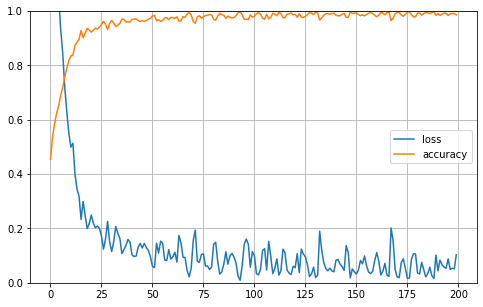

In [236]:

input_dim = X_mfcc.shape[1]
hidden_layers = [20,19,18,17]
init_activation = 'relu'
activation_funcs = ['relu','relu','relu','relu']
optimizer = 'adam'
loss = "sparse_categorical_crossentropy"
metrics = ["accuracy"]
epochs = 20
(X_mfcc, Y, model) = train_mlp(X_mfcc,Y,init_activation,hidden_layers,activation_funcs,optimizer,loss,metrics,epochs)
history_mfcc = model.fit(X_mfcc,Y,epochs=epochs,)
results = model.evaluate(X_mfcc_test,Y_test)
print("test loss, test acc:", results)
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [183]:
start = 0
increment = 12
#kurtosis, max, mean, medain, min, skew, std
X_chroma_cens_collapse_kurtosis = np.average(X_chroma_cens[:,start:start+increment],axis=1).reshape(X_chroma_cens.shape[0],1)
X_chroma_cens_test_collapse_kurtosis = np.average(X_chroma_cens_test[:,start:start+increment],axis=1).reshape(X_chroma_cens_test.shape[0],1)
X_chroma_cens_collapse_max = np.average(X_chroma_cens[:,start+increment:start+2*increment],axis=1).reshape(X_chroma_cens.shape[0],1)
X_chroma_cens_test_collapse_max = np.average(X_chroma_cens_test[:,start+increment:start+2*increment],axis=1).reshape(X_chroma_cens_test.shape[0],1)
X_chroma_cens_collapse_mean = np.average(X_chroma_cens[:,start+2*increment:start+3*increment],axis=1).reshape(X_chroma_cens.shape[0],1)
X_chroma_cens_test_collapse_mean = np.average(X_chroma_cens_test[:,start+2*increment:start+3*increment],axis=1).reshape(X_chroma_cens_test.shape[0],1)
X_chroma_cens_collapse_median = np.average(X_chroma_cens[:,start+3*increment:start+4*increment],axis=1).reshape(X_chroma_cens.shape[0],1)
X_chroma_cens_test_collapse_median = np.average(X_chroma_cens_test[:,start+3*increment:start+4*increment],axis=1).reshape(X_chroma_cens_test.shape[0],1)
X_chroma_cens_collapse_min = np.average(X_chroma_cens[:,start+4*increment:start+5*increment],axis=1).reshape(X_chroma_cens.shape[0],1)
X_chroma_cens_test_collapse_min = np.average(X_chroma_cens_test[:,start+4*increment:start+5*increment],axis=1).reshape(X_chroma_cens_test.shape[0],1)
X_chroma_cens_collapse_skew = np.average(X_chroma_cens[:,start+5*increment:start+6*increment],axis=1).reshape(X_chroma_cens.shape[0],1)
X_chroma_cens_test_collapse_skew = np.average(X_chroma_cens_test[:,start+5*increment:start+6*increment],axis=1).reshape(X_chroma_cens_test.shape[0],1)
X_chroma_cens_collapse_std = np.average(X_chroma_cens[:,start+6*increment:start+7*increment],axis=1).reshape(X_chroma_cens.shape[0],1)
X_chroma_cens_test_collapse_std = np.average(X_chroma_cens_test[:,start+6*increment:start+7*increment],axis=1).reshape(X_chroma_cens_test.shape[0],1)

X_chroma_cqt_collapse_kurtosis = np.average(X_chroma_cqt[:,start+0*increment:start+1*increment],axis=1).reshape(X_chroma_cqt.shape[0],1)
X_chroma_cqt_test_collapse_kurtosis = np.average(X_chroma_cqt_test[:,start+0*increment:start+1*increment],axis=1).reshape(X_chroma_cqt_test.shape[0],1)
X_chroma_cqt_collapse_max = np.average(X_chroma_cqt[:,start+1*increment:start+2*increment],axis=1).reshape(X_chroma_cqt.shape[0],1)
X_chroma_cqt_test_collapse_max = np.average(X_chroma_cqt_test[:,start+1*increment:start+2*increment],axis=1).reshape(X_chroma_cqt_test.shape[0],1)
X_chroma_cqt_collapse_mean = np.average(X_chroma_cqt[:,start+2*increment:start+3*increment],axis=1).reshape(X_chroma_cqt.shape[0],1)
X_chroma_cqt_test_collapse_mean = np.average(X_chroma_cqt_test[:,start+2*increment:start+3*increment],axis=1).reshape(X_chroma_cqt_test.shape[0],1)
X_chroma_cqt_collapse_median = np.average(X_chroma_cqt[:,start+3*increment:start+4*increment],axis=1).reshape(X_chroma_cqt.shape[0],1)
X_chroma_cqt_test_collapse_median = np.average(X_chroma_cqt_test[:,start+3*increment:start+4*increment],axis=1).reshape(X_chroma_cqt_test.shape[0],1)
X_chroma_cqt_collapse_min = np.average(X_chroma_cqt[:,start+4*increment:start+5*increment],axis=1).reshape(X_chroma_cqt.shape[0],1)
X_chroma_cqt_test_collapse_min = np.average(X_chroma_cqt_test[:,start+4*increment:start+5*increment],axis=1).reshape(X_chroma_cqt_test.shape[0],1)
X_chroma_cqt_collapse_skew = np.average(X_chroma_cqt[:,start+5*increment:start+6*increment],axis=1).reshape(X_chroma_cqt.shape[0],1)
X_chroma_cqt_test_collapse_skew = np.average(X_chroma_cqt_test[:,start+5*increment:start+6*increment],axis=1).reshape(X_chroma_cqt_test.shape[0],1)
X_chroma_cqt_collapse_std = np.average(X_chroma_cqt[:,start+6*increment:start+7*increment],axis=1).reshape(X_chroma_cqt.shape[0],1)
X_chroma_cqt_test_collapse_std = np.average(X_chroma_cqt_test[:,start+6*increment:start+7*increment],axis=1).reshape(X_chroma_cqt_test.shape[0],1)

#increment = 20
X_chroma_stft_collapse_kurtosis = np.average(X_chroma_stft[:,start+0*increment:start+1*increment],axis=1).reshape(X_chroma_stft.shape[0],1)
X_chroma_stft_test_collapse_kurtosis = np.average(X_chroma_stft_test[:,start+0*increment:start+1*increment],axis=1).reshape(X_chroma_stft_test.shape[0],1)
X_chroma_stft_collapse_max = np.average(X_chroma_stft[:,start+1*increment:start+2*increment],axis=1).reshape(X_chroma_stft.shape[0],1)
X_chroma_stft_test_collapse_max = np.average(X_chroma_stft_test[:,start+1*increment:start+2*increment],axis=1).reshape(X_chroma_stft_test.shape[0],1)
X_chroma_stft_collapse_mean = np.average(X_chroma_stft[:,start+2*increment:start+3*increment],axis=1).reshape(X_chroma_stft.shape[0],1)
X_chroma_stft_test_collapse_mean = np.average(X_chroma_stft_test[:,start+2*increment:start+3*increment],axis=1).reshape(X_chroma_stft_test.shape[0],1)
X_chroma_stft_collapse_median = np.average(X_chroma_stft[:,start+3*increment:start+4*increment],axis=1).reshape(X_chroma_stft.shape[0],1)
X_chroma_stft_test_collapse_median = np.average(X_chroma_stft_test[:,start+3*increment:start+4*increment],axis=1).reshape(X_chroma_stft_test.shape[0],1)
X_chroma_stft_collapse_min = np.average(X_chroma_stft[:,start+4*increment:start+5*increment],axis=1).reshape(X_chroma_stft.shape[0],1)
X_chroma_stft_test_collapse_min = np.average(X_chroma_stft_test[:,start+4*increment:start+5*increment],axis=1).reshape(X_chroma_stft_test.shape[0],1)
X_chroma_stft_collapse_skew = np.average(X_chroma_stft[:,start+5*increment:start+6*increment],axis=1).reshape(X_chroma_stft.shape[0],1)
X_chroma_stft_test_collapse_skew = np.average(X_chroma_stft_test[:,start+5*increment:start+6*increment],axis=1).reshape(X_chroma_stft_test.shape[0],1)
X_chroma_stft_collapse_std = np.average(X_chroma_stft[:,start+6*increment:start+7*increment],axis=1).reshape(X_chroma_stft.shape[0],1)
X_chroma_stft_test_collapse_std = np.average(X_chroma_stft_test[:,start+6*increment:start+7*increment],axis=1).reshape(X_chroma_stft_test.shape[0],1)

X_chroma_merge = np.concatenate([X_chroma_cens_collapse_kurtosis,X_chroma_cens_collapse_max,
                                 X_chroma_cens_collapse_mean,X_chroma_cens_collapse_median,
                                 X_chroma_cens_collapse_min, X_chroma_cens_collapse_skew,
                                 X_chroma_cens_collapse_std,
                                 X_chroma_cqt_collapse_kurtosis, X_chroma_cqt_collapse_max,
                                 X_chroma_cqt_collapse_mean, X_chroma_cqt_collapse_median,
                                 X_chroma_cqt_collapse_min, X_chroma_cqt_collapse_skew,
                                 X_chroma_cqt_collapse_std,
                                 X_chroma_stft_collapse_kurtosis, X_chroma_stft_collapse_max,
                                 X_chroma_stft_collapse_mean, X_chroma_stft_collapse_median,
                                 X_chroma_stft_collapse_min, X_chroma_stft_collapse_skew,
                                 X_chroma_stft_collapse_std],axis=1)
X_chroma_merge_test = np.concatenate([X_chroma_cens_test_collapse_kurtosis,X_chroma_cens_test_collapse_max,
                                 X_chroma_cens_test_collapse_mean,X_chroma_cens_test_collapse_median,
                                 X_chroma_cens_test_collapse_min, X_chroma_cens_test_collapse_skew,
                                 X_chroma_cens_test_collapse_std,
                                 X_chroma_cqt_test_collapse_kurtosis, X_chroma_cqt_test_collapse_max,
                                 X_chroma_cqt_test_collapse_mean, X_chroma_cqt_test_collapse_median,
                                 X_chroma_cqt_test_collapse_min, X_chroma_cqt_test_collapse_skew,
                                 X_chroma_cqt_test_collapse_std,
                                 X_chroma_stft_test_collapse_kurtosis, X_chroma_stft_test_collapse_max,
                                 X_chroma_stft_test_collapse_mean, X_chroma_stft_test_collapse_median,
                                 X_chroma_stft_test_collapse_min, X_chroma_stft_test_collapse_skew,
                                 X_chroma_stft_test_collapse_std],axis=1)              
        
print(X_chroma_merge.shape)
print(X_chroma_merge_test.shape)

print(7*increment)
print(X_chroma_stft.shape)

(9349, 21)
(40249, 21)
84
(9349, 84)


In [184]:
# Now that we have X_chroma all set up, we need to train and test it
input_dim = X_chroma_merge.shape[1]
hidden_layers = [20,19,18,17]
init_activation = 'relu'
activation_funcs = ['relu','relu','relu','relu']
optimizer = 'adam'
loss = "sparse_categorical_crossentropy"
metrics = ["accuracy"]
epochs = 200
(X_chroma_merge, Y, model) = train_mlp(X_chroma_merge,Y,init_activation,hidden_layers,activation_funcs,optimizer,loss,metrics,epochs)
history = model.fit(X_chroma_merge,Y,epochs=epochs,)
results = model.evaluate(X_chroma_merge_test,Y_test)
print("test loss, test acc:", results)

Epoch 1/200
293/293 [==============================] - 4s 9ms/step - loss: 2.3254 - accuracy: 0.2082
Epoch 2/200
293/293 [==============================] - 2s 8ms/step - loss: 2.0897 - accuracy: 0.2965
Epoch 3/200
293/293 [==============================] - 2s 8ms/step - loss: 2.0208 - accuracy: 0.3197
Epoch 4/200
293/293 [==============================] - 2s 8ms/step - loss: 1.9710 - accuracy: 0.3304
Epoch 5/200
293/293 [==============================] - 2s 8ms/step - loss: 1.9364 - accuracy: 0.3520
Epoch 6/200
293/293 [==============================] - 2s 8ms/step - loss: 1.9016 - accuracy: 0.3681
Epoch 7/200
293/293 [==============================] - 2s 8ms/step - loss: 1.8767 - accuracy: 0.3798
Epoch 8/200
293/293 [==============================] - 2s 8ms/step - loss: 1.8540 - accuracy: 0.3890
Epoch 9/200
293/293 [==============================] - 2s 8ms/step - loss: 1.8318 - accuracy: 0.3946
Epoch 10/200
293/293 [==============================] - 3s 9ms/step - loss: 1.8170 - accura

293/293 [==============================] - 2s 8ms/step - loss: 1.3641 - accuracy: 0.5413
Epoch 82/200
293/293 [==============================] - 2s 8ms/step - loss: 1.3424 - accuracy: 0.5460
Epoch 83/200
293/293 [==============================] - 2s 8ms/step - loss: 1.3348 - accuracy: 0.5510
Epoch 84/200
293/293 [==============================] - 2s 8ms/step - loss: 1.3386 - accuracy: 0.5545
Epoch 85/200
293/293 [==============================] - 2s 8ms/step - loss: 1.3220 - accuracy: 0.5589
Epoch 86/200
293/293 [==============================] - 2s 8ms/step - loss: 1.3315 - accuracy: 0.5566
Epoch 87/200
293/293 [==============================] - 2s 8ms/step - loss: 1.3083 - accuracy: 0.5631
Epoch 88/200
293/293 [==============================] - 2s 8ms/step - loss: 1.3115 - accuracy: 0.5636
Epoch 89/200
293/293 [==============================] - 2s 8ms/step - loss: 1.3068 - accuracy: 0.5616
Epoch 90/200
293/293 [==============================] - 2s 8ms/step - loss: 1.2834 - accuracy: 

293/293 [==============================] - 3s 9ms/step - loss: 0.9642 - accuracy: 0.6838
Epoch 161/200
293/293 [==============================] - 2s 8ms/step - loss: 0.9514 - accuracy: 0.6847
Epoch 162/200
293/293 [==============================] - 2s 8ms/step - loss: 0.9416 - accuracy: 0.6870
Epoch 163/200
293/293 [==============================] - 2s 8ms/step - loss: 0.9346 - accuracy: 0.6934
Epoch 164/200
293/293 [==============================] - 3s 9ms/step - loss: 0.9296 - accuracy: 0.6936
Epoch 165/200
293/293 [==============================] - 2s 8ms/step - loss: 0.9680 - accuracy: 0.6810
Epoch 166/200
293/293 [==============================] - 2s 8ms/step - loss: 0.9276 - accuracy: 0.6969
Epoch 167/200
293/293 [==============================] - 2s 8ms/step - loss: 0.8920 - accuracy: 0.7045
Epoch 168/200
293/293 [==============================] - 2s 8ms/step - loss: 0.9044 - accuracy: 0.7086
Epoch 169/200
293/293 [==============================] - 2s 8ms/step - loss: 0.9008 - a

In [191]:
start = 0
increment = 6
#kurtosis, max, mean, medain, min, skew, std
X_tonnetz_collapse_kurtosis = np.average(X_tonnetz[:,start:start+increment],axis=1).reshape(X_tonnetz.shape[0],1)
X_tonnetz_test_collapse_kurtosis = np.average(X_tonnetz_test[:,start:start+increment],axis=1).reshape(X_tonnetz_test.shape[0],1)
X_tonnetz_collapse_max = np.average(X_tonnetz[:,start+increment:start+2*increment],axis=1).reshape(X_tonnetz.shape[0],1)
X_tonnetz_test_collapse_max = np.average(X_tonnetz_test[:,start+increment:start+2*increment],axis=1).reshape(X_tonnetz_test.shape[0],1)
X_tonnetz_collapse_mean = np.average(X_tonnetz[:,start+2*increment:start+3*increment],axis=1).reshape(X_tonnetz.shape[0],1)
X_tonnetz_test_collapse_mean = np.average(X_tonnetz_test[:,start+2*increment:start+3*increment],axis=1).reshape(X_tonnetz_test.shape[0],1)
X_tonnetz_collapse_median = np.average(X_tonnetz[:,start+3*increment:start+4*increment],axis=1).reshape(X_tonnetz.shape[0],1)
X_tonnetz_test_collapse_median = np.average(X_tonnetz_test[:,start+3*increment:start+4*increment],axis=1).reshape(X_tonnetz_test.shape[0],1)
X_tonnetz_collapse_min = np.average(X_tonnetz[:,start+4*increment:start+5*increment],axis=1).reshape(X_tonnetz.shape[0],1)
X_tonnetz_test_collapse_min = np.average(X_tonnetz_test[:,start+4*increment:start+5*increment],axis=1).reshape(X_tonnetz_test.shape[0],1)
X_tonnetz_collapse_skew = np.average(X_tonnetz[:,start+5*increment:start+6*increment],axis=1).reshape(X_tonnetz.shape[0],1)
X_tonnetz_test_collapse_skew = np.average(X_tonnetz_test[:,start+5*increment:start+6*increment],axis=1).reshape(X_tonnetz_test.shape[0],1)
X_tonnetz_collapse_std = np.average(X_tonnetz[:,start+6*increment:start+7*increment],axis=1).reshape(X_tonnetz.shape[0],1)
X_tonnetz_test_collapse_std = np.average(X_tonnetz_test[:,start+6*increment:start+7*increment],axis=1).reshape(X_tonnetz_test.shape[0],1)

X_tonnetz_merge = np.concatenate([X_tonnetz_collapse_kurtosis,X_tonnetz_collapse_max,
                                 X_tonnetz_collapse_mean,X_tonnetz_collapse_median,
                                 X_tonnetz_collapse_min, X_tonnetz_collapse_skew,
                                 X_tonnetz_collapse_std],axis=1)
X_tonnetz_merge_test = np.concatenate([X_tonnetz_test_collapse_kurtosis,X_tonnetz_test_collapse_max,
                                 X_tonnetz_test_collapse_mean,X_tonnetz_test_collapse_median,
                                 X_tonnetz_test_collapse_min, X_tonnetz_test_collapse_skew,
                                 X_tonnetz_test_collapse_std],axis=1)     
print(X_tonnetz_merge.shape)
print(X_tonnetz_merge_test.shape)
print(7*increment)
print(X_tonnetz.shape)

print(X_tonnetz[:,start:start+increment])


(9349, 7)
(40249, 7)
42
(9349, 42)
[[ 0.20907183 -0.04795524  0.23917748  0.98904675 -0.03416466 -0.01869483]
 [ 2.5969286  -0.1362452  -0.5054727  -0.01988691 -0.1878658   4.2842083 ]
 [ 0.7060461   1.2577915  -0.4130194   1.0615699  -0.09775992  0.42199284]
 ...
 [-0.24188799 -0.200364   -0.3140691  -0.20671429 -0.23203039 -0.26597607]
 [ 0.36613807 -0.24815409 -0.7869396  -0.28091946 -0.4870557  -0.1599629 ]
 [-0.19974287 -0.11263731 -0.49169943  0.67468435 -0.19026972 -0.08547851]]


In [192]:
# Now that we have X_tonnetz all set up, we need to train and test it
input_dim = X_tonnetz_merge.shape[1]
hidden_layers = [4,2]
init_activation = 'relu'
activation_funcs = ['relu','relu',]
optimizer = 'adam'
loss = "sparse_categorical_crossentropy"
metrics = ["accuracy"]
epochs = 5
(X_tonnetz_merge, Y, model) = train_mlp(X_tonnetz_merge,Y,init_activation,hidden_layers,activation_funcs,optimizer,loss,metrics,epochs)
history = model.fit(X_tonnetz_merge,Y,epochs=epochs,)
results = model.evaluate(X_tonnetz_merge_test,Y_test)
print("test loss, test acc:", results)

Epoch 1/5
293/293 [==============================] - 3s 8ms/step - loss: 2.7113 - accuracy: 0.1078
Epoch 2/5
293/293 [==============================] - 2s 8ms/step - loss: 2.6224 - accuracy: 0.1023
Epoch 3/5
293/293 [==============================] - 3s 10ms/step - loss: 2.5696 - accuracy: 0.1017
Epoch 4/5
293/293 [==============================] - 3s 9ms/step - loss: 2.5380 - accuracy: 0.0982
Epoch 5/5
1258/1258 [==============================] - 12s 9ms/step - loss: 2.3704 - accuracy: 0.0634
test loss, test acc: [2.3703606128692627, 0.06338045746088028]


In [ ]:
#I think this entire block is old
'''
start = 412
increment = 7
#kurtosis, max, mean, medain, min, skew, std
X_tonnetz_collapse_kurtosis = np.average(X_tonnetz[:,start:start+increment],axis=1).reshape(X_tonnetz.shape[0],1)
X_tonnetz_test_collapse_kurtosis = np.average(X_tonnetz_test[:,start:start+increment],axis=1).reshape(X_tonnetz_test.shape[0],1)
X_tonnetz_collapse_max = np.average(X_tonnetz[:,start+increment:start+2*increment],axis=1).reshape(X_tonnetz.shape[0],1)
X_tonnetz_test_collapse_max = np.average(X_tonnetz_test[:,start+increment:start+2*increment],axis=1).reshape(X_tonnetz_test.shape[0],1)
X_tonnetz_collapse_mean = np.average(X_tonnetz[:,start+2*increment:start+3*increment],axis=1).reshape(X_tonnetz.shape[0],1)
X_tonnetz_test_collapse_mean = np.average(X_tonnetz_test[:,start+2*increment:start+3*increment],axis=1).reshape(X_tonnetz_test.shape[0],1)
X_tonnetz_collapse_median = np.average(X_tonnetz[:,start+3*increment:start+4*increment],axis=1).reshape(X_tonnetz.shape[0],1)
X_tonnetz_test_collapse_median = np.average(X_tonnetz_test[:,start+3*increment:start+4*increment],axis=1).reshape(X_tonnetz_test.shape[0],1)
X_tonnetz_collapse_min = np.average(X_tonnetz[:,start+4*increment:start+5*increment],axis=1).reshape(X_tonnetz.shape[0],1)
X_tonnetz_test_collapse_min = np.average(X_tonnetz_test[:,start+4*increment:start+5*increment],axis=1).reshape(X_tonnetz_test.shape[0],1)
X_tonnetz_collapse_skew = np.average(X_tonnetz[:,start+5*increment:start+6*increment],axis=1).reshape(X_tonnetz.shape[0],1)
X_tonnetz_test_collapse_skew = np.average(X_tonnetz_test[:,start+5*increment:start+6*increment],axis=1).reshape(X_tonnetz_test.shape[0],1)
X_tonnetz_collapse_std = np.average(X_tonnetz[:,start+6*increment:start+7*increment],axis=1).reshape(X_tonnetz.shape[0],1)
X_tonnetz_test_collapse_std = np.average(X_tonnetz_test[:,start+6*increment:start+7*increment],axis=1).reshape(X_tonnetz_test.shape[0],1)

X_tonnetz_merge = np.concatenate([X_tonnetz_collapse_kurtosis,X_tonnetz_collapse_max,
                                 X_tonnetz_collapse_mean,X_tonnetz_collapse_median,
                                 X_tonnetz_collapse_min, X_tonnetz_collapse_skew,
                                 X_tonnetz_collapse_std],axis=1)
X_tonnetz_merge_test = np.concatenate([X_tonnetz_test_collapse_kurtosis,X_tonnetz_test_collapse_max,
                                 X_tonnetz_test_collapse_mean,X_tonnetz_test_collapse_median,
                                 X_tonnetz_test_collapse_min, X_tonnetz_test_collapse_skew,
                                 X_tonnetz_test_collapse_std],axis=1)     
print(X_tonnetz_merge.shape)
print(X_tonnetz_merge_test.shape)
'''

In [ ]:
# now training on everything
input_dim = X_tonnetz_merge.shape[1]
hidden_layers = [4,2]
init_activation = 'relu'
activation_funcs = ['relu','relu',]
optimizer = 'adam'
loss = "sparse_categorical_crossentropy"
metrics = ["accuracy"]
epochs = 5
(X_tonnetz_merge, Y, model) = train_mlp(X_tonnetz_merge,Y,init_activation,hidden_layers,activation_funcs,optimizer,loss,metrics,epochs)
history = model.fit(X_tonnetz_merge,Y,epochs=epochs,)
results = model.evaluate(X_tonnetz_merge_test,Y_test)
print("test loss, test acc:", results)

In [233]:
def train_cnn(X,Y,init_activation,hidden_layers,activation_funcs,optimizer,loss,metrics,epochs):
    
    #usage: history = train_mlp(X,Y,input_dim,hidden_layers,activation_funcs,optimizer,loss,metrics,epochs)
    
    # X: input training matrix
    # Y: labels (numerical)
    # init_activation: activation function for the first layer (just easier to code if it's separate from the others)
    # hidden_layers: list of numbers of nodes for hidden each layer,
    # --------------> starting from the second (the first will have all 520 features)
    # activation_funcs: activation function for each hidden layer (string)
    # optimizer: some kind of thing
    # loss: string specifying loss function
    # metrics: list of strings of metrics to use to measure the success of the model on training set
    # epochs: number of training epochs
    
    # first, scale data to mean 0 and variance 1
    scaler = StandardScaler()
    scaler.fit(X)
    X = scaler.transform(X)
    
    # then, get X and Y in proper forms
    X = np.asarray(X).astype('float32')
    Y = np.asarray(Y).astype('float32')
    
    inputs = keras.Input(shape=(X.shape[1],X.shape[0]))
    x = layers.Conv1D(input_shape=(X.shape[1],X.shape[0]),activation='relu',kernel_size=1,filters=1)(inputs)
    for n in range(len(hidden_layers)):
        x = layers.Conv1D(input_shape=(X.shape[1],X.shape[0]),activation='relu',filters=1,kernel_size=1)(x)
    
    x = layers.GlobalMaxPooling1D()(x)
    outputs = layers.Dense(16, activation="softmax")(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=optimizer,loss=loss,metrics=metrics)
    return (X, Y, model) 

In [234]:
input_dim = X_chroma_cens.shape[1]
hidden_layers = [(X_chroma_cens.shape[1],X_chroma_cens.shape[0]),(X_chroma_cens.shape[1],X_chroma_cens.shape[0])]
init_activation = 'relu'
activation_funcs = ['relu','relu',]
optimizer = 'adam'
loss = "sparse_categorical_crossentropy"
metrics = ["accuracy"]
epochs = 5
(X_chroma_cens, Y, model) = train_cnn(X_chroma_cens,Y,init_activation,hidden_layers,activation_funcs,optimizer,loss,metrics,epochs)
history = model.fit(X_chroma_cens,Y,epochs=epochs,)
results = model.evaluate(X_chroma_cens_test,Y_test)
print("test loss, test acc:", results)

Epoch 1/5


ValueError: in user code:

    File "C:\Users\Finn\anaconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Finn\anaconda3\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Finn\anaconda3\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Finn\anaconda3\lib\site-packages\keras\engine\training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\Finn\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Finn\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 228, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "model_60" (type Functional).
    
    Input 0 of layer "conv1d_19" is incompatible with the layer: expected min_ndim=3, found ndim=2. Full shape received: (None, 84)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, 84), dtype=float32)
      • training=True
      • mask=None
